# Introduction to Pandas

Pandas is a Python package that provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive

### Notebook lessons 

**1.- Load a csv/tsv/excel file and explore it**

**2.- Basic Data Exploration**

**3.- Column & row operations**

**4.- Groupby, apply & Lambda function**

## 1.- Load a csv/tsv/excel file and explore it

The first thing that needs to be done is to load the package so that it can be used. As a convention the **pandas library is always imported as pd**

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

After we can use the package the initial step is to load the dataset that we will use. To do so we use the function **read_csv** from pandas. 

In [151]:
df = pd.read_csv('../datasets/Dataset_credit_scoring.tsv', sep='\t')

In [152]:
df_excel = pd.read_excel('../datasets/Dataset_credit_scoring.xlsx')

In [153]:
df_excel.head()

,Occupation,Age,Loan_Salary_ratio,Outcome
0,Industrial,34,2.96,Repay
1,Professional,41,4.64,Default
2,Professional,36,3.22,Default
3,Professional,41,3.11,Default
4,Industrial,48,3.80,Default


## 2.- Basic Data Exploration

The next step is to explore the data. To do so we normally employ some simple functions such as head(), info(), describe(), dtypes, columns, index, 

In [154]:
df.head()

,Occupation,Age,Loan_Salary_ratio,Outcome
0,Industrial,34,2.96,Repay
1,Professional,41,4.64,Default
2,Professional,36,3.22,Default
3,Professional,41,3.11,Default
4,Industrial,48,3.80,Default


In [155]:
df.tail()

,Occupation,Age,Loan_Salary_ratio,Outcome
5,Industrial,61,2.53,Repay
6,Professional,37,1.50,Repay
7,Professional,40,1.93,Repay
8,Industrial,33,5.25,Default
9,Industrial,32,4.15,Default


In [156]:
df.head(8)

,Occupation,Age,Loan_Salary_ratio,Outcome
0,Industrial,34,2.96,Repay
1,Professional,41,4.64,Default
2,Professional,36,3.22,Default
3,Professional,41,3.11,Default
4,Industrial,48,3.80,Default
5,Industrial,61,2.53,Repay
6,Professional,37,1.50,Repay
7,Professional,40,1.93,Repay


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation         10 non-null     object 
 1   Age                10 non-null     int64  
 2   Loan_Salary_ratio  10 non-null     float64
 3   Outcome            10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 448.0+ bytes


In [158]:
df.columns

Index(['Occupation', 'Age', 'Loan_Salary_ratio', 'Outcome'], dtype='object')

In [159]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [160]:
df.describe()

,Age,Loan_Salary_ratio
count,10.000000,10.00000
mean,40.300000,3.30900
std,8.692909,1.17557
min,32.000000,1.50000
25%,34.500000,2.63750
50%,38.500000,3.16500
75%,41.000000,4.06250
max,61.000000,5.25000


## 3.- Row & Column Operations

In [161]:
df.columns

Index(['Occupation', 'Age', 'Loan_Salary_ratio', 'Outcome'], dtype='object')

In [162]:
df['Outcome']

0      Repay
1    Default
2    Default
3    Default
4    Default
5      Repay
6      Repay
7      Repay
8    Default
9    Default
Name: Outcome, dtype: object

In [163]:
df['Outcome'].value_counts()

Default    6
Repay      4
Name: Outcome, dtype: int64

In [164]:
df['Outcome'].unique()

array(['Repay', 'Default'], dtype=object)

In [165]:
df['Outcome'].nunique()

2

In [166]:
print(df['Age'].min(), df['Age'].max())

32 61


In [167]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

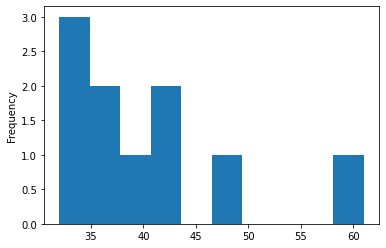

In [168]:
df['Age'].plot(kind='hist')

<AxesSubplot:>

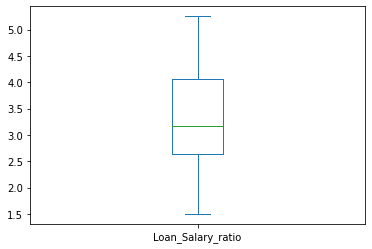

In [169]:
df['Loan_Salary_ratio'].plot(kind = 'box')

Columns are the backbone for any AI or ML model. They represent the features of any possible the model. Therefore, it is important to work with them in pandas. In addition to the simple operations above, some more things can be done:

- Separate dataframes
- Filter data by selecting a certain number of columns or rows
- Create new columns through an operation 

### Separate dataframes

In [170]:
df['Age'] > 40

0    False
1     True
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9    False
Name: Age, dtype: bool

In [171]:
df_age_40 = df[df['Age'] > 40]
df_age_40.head()

,Occupation,Age,Loan_Salary_ratio,Outcome
1,Professional,41,4.64,Default
3,Professional,41,3.11,Default
4,Industrial,48,3.80,Default
5,Industrial,61,2.53,Repay


### Filter data by selecting a certain number of columns or rows

In [172]:
new_df = df[['Age', 'Loan_Salary_ratio', 'Outcome']]
new_df.head()

,Age,Loan_Salary_ratio,Outcome
0,34,2.96,Repay
1,41,4.64,Default
2,36,3.22,Default
3,41,3.11,Default
4,48,3.80,Default


In [173]:
new_df.index = ['Ramon', 'Julio', 'Lorenzo', 'Paco', 'Maria', 'Laura', 'Ricardo', 'Ana', 'Julia', 'Rosa']

In [178]:
new_df.head()

,Age,Loan_Salary_ratio,Outcome
Ramon,34,2.96,Repay
Julio,41,4.64,Default
Lorenzo,36,3.22,Default
Paco,41,3.11,Default
Maria,48,3.80,Default


In [179]:
new_df.iloc[0]

Age                     34
Loan_Salary_ratio     2.96
Outcome              Repay
Name: Ramon, dtype: object

In [180]:
new_df.loc['Ramon']

Age                     34
Loan_Salary_ratio     2.96
Outcome              Repay
Name: Ramon, dtype: object

In [181]:
new_df.drop(['Age'], axis=1)

,Loan_Salary_ratio,Outcome
Ramon,2.96,Repay
Julio,4.64,Default
Lorenzo,3.22,Default
Paco,3.11,Default
Maria,3.80,Default
Laura,2.53,Repay
Ricardo,1.50,Repay
Ana,1.93,Repay
Julia,5.25,Default
Rosa,4.15,Default


In [182]:
new_df.drop(['Ramon'])

,Age,Loan_Salary_ratio,Outcome
Julio,41,4.64,Default
Lorenzo,36,3.22,Default
Paco,41,3.11,Default
Maria,48,3.80,Default
Laura,61,2.53,Repay
Ricardo,37,1.50,Repay
Ana,40,1.93,Repay
Julia,33,5.25,Default
Rosa,32,4.15,Default


### Create new columns through an operation

In [76]:
df['Age'] / df['Loan_Salary_ratio']

0    11.486486
1     8.836207
2    11.180124
3    13.183280
4    12.631579
5    24.110672
6    24.666667
7    20.725389
8     6.285714
9     7.710843
dtype: float64

In [77]:
df['Age_Loan_Salary_ratio'] = df['Age'] / df['Loan_Salary_ratio']

In [78]:
df.head()

,Occupation,Age,Loan_Salary_ratio,Outcome,Age_Loan_Salary_ratio
0,Industrial,34,2.96,Repay,11.486486
1,Professional,41,4.64,Default,8.836207
2,Professional,36,3.22,Default,11.180124
3,Professional,41,3.11,Default,13.183280
4,Industrial,48,3.80,Default,12.631579


## 4.- Groupby, apply & Lambda function

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [185]:
df['Age'].mean()

40.3

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

In [188]:
df[df['Outcome'] == 'Repay']['Age'].mean()

43.0

In [189]:
df[df['Outcome'] == 'Default']['Age'].mean()

38.5

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure


Instead of doing the manual filtering as above


    df[df['Outcome'] == 'Repay']['Age'].mean()
    df[df['Outcome'] == 'Default']['Age'].mean()
    ...

pandas provides the `groupby` method to do exactly this:


In [194]:
df.groupby('Outcome')['Age'].mean()

Outcome
Default    38.5
Repay      43.0
Name: Age, dtype: float64

In [193]:
df.groupby('Outcome')['Age'].apply(lambda x: x.sum()/x.count())

Outcome
Default    38.5
Repay      43.0
Name: Age, dtype: float64